# Por que Julia?

## Por que escolher Julia?

-   A linguagem de programação `Julia`, lançada oficialmente em 2012, tem se destacado como uma alternativa moderna para ciência de dados e computação científica, competindo com linguagens como `Matlab`, `Python` e `R`;
-   É utilizada não apenas na academia, [mas também fora dela.](https://ime.unicamp.br/julialang/Blog/Julia%20no%20Mercado%20de%20Trabalho.html);
-   `Julia` é gratuita;
-   `Julia` oferece desempenho próximo ao de C++, aliado à facilidade de aprendizado e sintaxe simples, comparáveis a `Python` e `R`;
-   `Julia` permite escrever código com símbolos matemáticos diretamente `r emo::ji("nerd")`, facilitando a expressão de conceitos científicos;
-   `Julia` resolve o problema das duas linguagens `r emo::ji("cool")`;
-   Etc.

## Do Zero ao Julia

Conheça o nosso Blog!

www.ime.unicamp.br/julialang

# Importação de Dados

Nesta seção veremos como importar nossos datasets, estando eles armazenados localmente ou online. Também veremos a diferença na leitura de diferentes formatos, como **.csv**, **.txt** e **.xlsx**.

## Pacotes necessários

O `Julia` conta com diversos pacotes que usamos para leitura de datasets, dentre eles vamos focar nos seguintes:

``` julia
import Pkg

Pkg.add("DataFrames");
Pkg.add("CSV")
Pkg.add("XLSX")
```

- `DataFrames` : Manipulação e análise de dados em formato tabular, similar ao pandas (`Python`) ou data.frame (`R`);
- `CSV` : Leitura e escrita de arquivos CSV de forma rápida e eficiente;
- `XLSX` : Leitura e escrita de arquivos Excel (.xlsx).

## Funções básicas

Com os pacotes necessários instalados, agora vejamos como as funções de leitura funcionam:

``` julia
using DataFrames, CSV, XLSX

# .csv

df_csv = CSV.read("caminho/dados.csv", DataFrame)

# .txt

df_txt = CSV.read("caminho/dados.txt", DataFrame, delim=';')

# .xlsx

sheets = XLSX.readxlsx("caminho/dados.xlsx")
df_xlsx = DataFrame(sheets)
```

## Funções básicas

Podemos usar a função `download()` é usada para baixar um arquivo temporariamente e retorna o caminho local onde ele foi salvo.

**Ex.:**

``` julia
using DataFrames

dados_csv = CSV.read(download(url), DataFrame, delim=';')

first(dados_csv, 5) # Podemos usar a função first() para visualizar as primeiras linhas do dataset
```

## Importação dos pacotes

Agora, vamos botar a mão na massa e ler os dados que usaremos na aula de hoje!

Primeiramente, faremos a importação de todos os pacotes que usaremos ao longo do código.

Essa é uma prática recomendada quando o projeto já foi inteiramente desenvolvido e já sabemos de quais pacotes precisaremos.

Vale ressaltar que, apesar de esse ser nosso primeiro bloco (por motivos de praticidade e otimização de tempo no minicurso), na prática, essa é a última etapa feita.  


In [ ]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsBase")
Pkg.add("Plots")
Pkg.add("TidierData")
Pkg.add("StatsPlots")
Pkg.add("MLJ")
Pkg.add("CategoricalArrays")
Pkg.add("GLM")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [2913bbd2] + StatsBase v0.34.6
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
   Installed ShiftedArrays ─ v2.0.0
   Installed Chain ───────── v0.6.0
   Installed Cleaner ─────── v1.1.1
   Installed TidierData ──── v0.17.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [fe2206b3] + TidierData v0.17.0
    Updating `~/.julia/environment

## Leitura da base de dados

Agora, vamos botar a mão na massa e ler os dados que usaremos na aula de hoje!

- **Exercício 1**
  - **1.1** Escreva o código para o ler o dataset vindo da url abaixo.
  - **1.2** Visualize as primeiras 10 linhas do seu dataset.
  

https://raw.githubusercontent.com/Arthur-Dionizio/minicurso-julia/main/datasets/dataset.csv

In [ ]:
using CSV, DataFrames
path = "https://raw.githubusercontent.com/Arthur-Dionizio/minicurso-julia/main/datasets/dataset.csv"

df = CSV.read(download(path), DataFrame) # Lemos o caminho do dataset
first(df, 5) # Filtramos as primeiras 5 linhas do dataset# Escreva seu código aqui

Row,Column1,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,Int64,String31,String?,String?,String?,Int64,Int64,Bool,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,String31
1,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,false,0.676,0.461,1,-6.746,0,0.143,0.0322,1.01e-6,0.358,0.715,87.917,4,acoustic
2,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,false,0.42,0.166,1,-17.235,1,0.0763,0.924,5.56e-6,0.101,0.267,77.489,4,acoustic
3,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,false,0.438,0.359,0,-9.734,1,0.0557,0.21,0.0,0.117,0.12,76.332,4,acoustic
4,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,false,0.266,0.0596,0,-18.515,1,0.0363,0.905,7.07e-5,0.132,0.143,181.74,3,acoustic
5,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,false,0.618,0.443,2,-9.681,1,0.0526,0.469,0.0,0.0829,0.167,119.949,4,acoustic


# Banco de dados

## Dados de faixas do Spotify

Vamos analisar um banco de dados de faixas do Spotify abrangendo 125 gêneros diferentes. Aqui estão as principais colunas do dataset:

1. **`track_id`**: O ID do Spotify para a faixa.

2. **`artists`**: Os nomes dos artistas que interpretaram a faixa. Se houver mais de um artista, eles serão separados por ";" ;

3. **`album_name`**: O nome do álbum de onde a faixa pertence;

4. **`track_name`**: Nome da faixa;

5. **`popularity`**: A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular, sendo calculada a partir (de forma geral) do número de streams daquela faixa, e o quão recente foram essas streams;

6. **`duration_ms`**: A duração da faixa em milissegundos;

7. **`explicit`**: Indica se a faixa contém letras explícitas (`true` = sim, contém; `false` = não contém ou desconhecido);

8. **`danceability`**: A dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançante e 1,0 o mais dançante;

9. **`energy`**: Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente, músicas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem baixa pontuação na escala;

10. **`key`**: A tonalidade em que a faixa está. Os inteiros mapeiam para notas usando a notação de classe de alturas padrão (*Pitch Class*). Se nenhuma tonalidade for detectada, o valor é -1;

11. **`loudness`**: O volume total de uma faixa em decibéis (dB);

12. **`mode`**: O modo indica a modalidade (maior ou menor) de uma faixa, ou seja, o tipo de escala a partir da qual seu conteúdo melódico é derivado. O modo maior é representado por 1 e o menor por 0;

13. **`speechiness`**: Detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas que não se assemelham à fala;

14. **`acousticness`**: Uma medida de confiança de 0,0 a 1,0 para determinar se a faixa é acústica. 1,0 representa alta confiança de que a faixa é acústica;

15. **`valence`**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, raivosas);

16. **`tempo`**: O andamento estimado geral de uma faixa em batidas por minuto (BPM);

17. **`track_genre`**: O gênero da faixa;

18. **`instrumentalness`**: Prevê se uma faixa não contém vocais. Sons de "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente "vocais". Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal;

19. **`liveness`**: Detecta a presença de público na gravação. Valores mais altos de ao vivo representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece alta probabilidade de que a faixa seja ao vivo;

20. **`time_signature`**: Fórmula de compasso estimada. O compasso é uma convenção de notação que especifica quantas batidas há em cada compasso. O valor varia de 3 a 7, representando compassos de 3/4 até 7/4.

# Manipulação de banco de dados

Agora que temos o nosso dataset, vamos passar por algumas funções e pacotes que vão nos auxiliar na limpeza dos nossos dados!

## Tidier.jl

A biblioteca `Tidier.jl` possui vários pacotes que auxiliam na manipulação e análise de datasets. Para quem está vindo do `R`, esses pacotes são bem similares e intuitivos. Aqui estão alguns dos pacotes:

- **`TidierData`** : Implementação 100% `Julia` dos pacotes `dplyr` e `tidyr` do `R`. Usado na tranformação e manipulação dos dados;
- **`TidierPlots`** : Implementação 100% `Julia` do pacote `ggplot2` do `R`;
- **`TidierStrings`** : O objetivo deste pacote é replicar o `stringr` do `R` em `Julia` de uma forma que funcione com o Tidier ou como uma função autônoma.

> Para saber mais sobre o uso do pacote Tidier.jl e suas funcionalidades, consulte a [documentação oficial](https://tidierorg.github.io/Tidier.jl/v1.6.1/) e o [artigo do blog do IMECC/Unicamp](https://ime.unicamp.br/julialang/Blog/tidierdata.html).

## Pacote TidierData.jl

Para a nossa análise de hoje, vamos utilizar principalmente o pacote `TidierData`.

### Funções Macro

Para suportar a programação no estilo `R`, o `TidierData.jl` é implementado usando **macros**. Isso ocorre porque as **macros** são capazes de "capturar" o código antes de executá-lo, o que permite que o pacote suporte "expressões *tidy*" semelhantes ao `R` que, de outra forma, não seriam consideradas código `Julia` válido.

In [ ]:
using TidierData

@chain df begin
    @filter(popularity > 50)
    @arrange(desc("energy"))
    @select(track_name, popularity, energy, acousticness)
    @slice(1:5)
end

Row,track_name,popularity,energy,acousticness
,String?,Int64,Float64,Float64
1,Meeresrauschen zum Schlafen,52,0.999,0.554
2,Voodoo People,56,0.998,0.00128
3,Bleed,60,0.998,8.12e-6
4,Wait A Minute,58,0.998,0.0496
5,Hooked,52,0.998,0.0207


- Para quem já está familiarizado com a linguagem `R`, a função `@chain()` é similar ao pipeline `%>%` ou `|>`, usado para encadear várias operações em sequência no mesmo conjunto de dados.

    - `@filter()` : Filtra as linhas com base em uma restrição;
    - `@arrange()` : Ordena as linhas com base em uma coluna (`desc()` para definir ordem crescente ou decrescente);
    - `@select()` : Seleciona as colunas de interesse;
    - `@slice()` : Seleciona as linhas para visualização.

> Obs.: A função `desc()` é uma função auxiliar.

---

### Funções auxiliares

Algumas funções auxiliares do pacote que é importante citarmos:

- `across()` : Aplica uma função a várias colunas de uma vez;
- `n()` e `row_number()` : Retornam o número total de linhas ou o número da linha;
- `replace_missing()` : Substitui valores ausentes em uma coluna por um valor especificado.

Outras funções auxiliares do pacote DataFrames.jl e da base do `Julia` que vale mencionar:

- `dropmissing()` : Remove as linhas que contêm valores faltantes (*missing*);
- `unique()` : Retorna os valores distintos únicos de um vetor ou coluna, removendo duplicatas;
- `nrow()` : Retorna o número de linhas de um DataFrame ou matriz;
- `any()` : Testa se **pelo menos um** elemento de uma coleção (ou resultado de uma condição) é verdadeiro; retorna `true` ou `false`.

## Limpeza Pt. 1 - Tratando valores faltantes

- **Exercício 2**
  - **2.1** Verifique quantas linhas possuem `missing` em alguma coluna.
  - **2.2** Retire essas linhas do dataset.

> Dica: Use a função `any()` e a função `ismissing` no formato `row -> any(ismissing, row)` para verificar se há colunas sem informação. Nesse caso, a função `filter()` da base do `Julia` é mais eficiente, no formato `filter(condição, dados)`.

In [ ]:
# Escreva seu código aqui

In [ ]:
filter!(row -> any(!ismissing, row), df)

Row,Column1,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,Int64,String31,String?,String?,String?,Int64,Int64,Bool,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,String31
1,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,false,0.676,0.461,1,-6.746,0,0.143,0.0322,1.01e-6,0.358,0.715,87.917,4,acoustic
2,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,false,0.42,0.166,1,-17.235,1,0.0763,0.924,5.56e-6,0.101,0.267,77.489,4,acoustic
3,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,false,0.438,0.359,0,-9.734,1,0.0557,0.21,0.0,0.117,0.12,76.332,4,acoustic
4,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,false,0.266,0.0596,0,-18.515,1,0.0363,0.905,7.07e-5,0.132,0.143,181.74,3,acoustic
5,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,false,0.618,0.443,2,-9.681,1,0.0526,0.469,0.0,0.0829,0.167,119.949,4,acoustic
6,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,false,0.688,0.481,6,-8.807,1,0.105,0.289,0.0,0.189,0.666,98.017,4,acoustic
7,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,false,0.407,0.147,2,-8.822,1,0.0355,0.857,2.89e-6,0.0913,0.0765,141.284,3,acoustic
8,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,false,0.703,0.444,11,-9.331,1,0.0417,0.559,0.0,0.0973,0.712,150.96,4,acoustic
9,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,false,0.625,0.414,0,-8.7,1,0.0369,0.294,0.0,0.151,0.669,130.088,4,acoustic


Obs: Caso queira conferir o tipo dos dados de cada coluna, utilize:

In [ ]:
# eltype.(eachcol(df))

## Limpeza Pt. 2 - Tratando valores duplicados

Agora sem valores faltantes, vamos verificar faixas duplicadas.

- **Exercício 3**
  - **3.1** Verifique quantas faixas duplicadas tem no dataset (filtre pelo `track_id`).
  - **3.2** Retire as faixas duplicadas.

In [ ]:
# Escreva seu código aqui

In [ ]:
df = unique!(df, :track_id)


Row,Column1,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,Int64,String31,String?,String?,String?,Int64,Int64,Bool,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,String31
1,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,false,0.676,0.461,1,-6.746,0,0.143,0.0322,1.01e-6,0.358,0.715,87.917,4,acoustic
2,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,false,0.42,0.166,1,-17.235,1,0.0763,0.924,5.56e-6,0.101,0.267,77.489,4,acoustic
3,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,false,0.438,0.359,0,-9.734,1,0.0557,0.21,0.0,0.117,0.12,76.332,4,acoustic
4,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,false,0.266,0.0596,0,-18.515,1,0.0363,0.905,7.07e-5,0.132,0.143,181.74,3,acoustic
5,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,false,0.618,0.443,2,-9.681,1,0.0526,0.469,0.0,0.0829,0.167,119.949,4,acoustic
6,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,false,0.688,0.481,6,-8.807,1,0.105,0.289,0.0,0.189,0.666,98.017,4,acoustic
7,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,false,0.407,0.147,2,-8.822,1,0.0355,0.857,2.89e-6,0.0913,0.0765,141.284,3,acoustic
8,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,false,0.703,0.444,11,-9.331,1,0.0417,0.559,0.0,0.0973,0.712,150.96,4,acoustic
9,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,false,0.625,0.414,0,-8.7,1,0.0369,0.294,0.0,0.151,0.669,130.088,4,acoustic




---



## Análise Exploratória dos Dados (EDA)

Nesta etapa, exploramos as variáveis do dataset para entender a distribuição dos dados, identificar padrões e obter insights iniciais.

**`Statistics.jl`**: Biblioteca padrão do Julia que oferece funções estatísticas básicas, como média (mean), mediana (median), variância (var), desvio-padrão (std), entre outras.

**`StatsBase.jl`**: Complementa o pacote Statistics com funções estatísticas adicionais, como countmap (para criar tabelas de frequência), cálculo de quantis, amostragem aleatória e medidas de dispersão.

**`Plots.jl`**: Biblioteca versátil de criação de gráficos, permitindo gerar diferentes tipos de visualizações de forma simples e customizável.

**`StatsPlots.jl`**: Extensão do Plots.jl que integra funcionalidades estatísticas, permitindo criar gráficos como boxplots, violin plots e heatmaps diretamente a partir de DataFrames.

> Para aprender mais sobre a criação de gráficos no Julia, acesse o tutorial oficial disponível no site do [IMECC/Unicamp: Gráficos básicos em Julia](https://ime.unicamp.br/julialang/Tutoriais/graf_basico.html).


## Gerando estatísticas descritivas
Nesta etapa, utilizaremos funções básicas dos pacotes Statistics, StatsPlots e Plots para explorar e resumir o conjunto de dados.

- **Exercício 4**
  - **4.1** Importe as bibliotecas mencionadas acima para habilitar o cálculo de medidas estatísticas e a criação de visualizações.
  - **4.2** Identifique e liste os cinco (5) artistas com maior número de faixas no dataset, ou seja, aqueles mais presentes na base de dados — lembrando que isso não implica necessariamente que sejam os mais populares.
  - **4.3** Obtenha as estatísticas descritivas das variáveis numéricas referentes ao artista com o maior número de faixas no dataset.

In [ ]:
# Escreva seu código aqui

In [ ]:
using Statistics, StatsPlots, Plots

## Gerando gráficos descritivos
- **Exercício 5**
  - **5.1** Converta a variável `duration_ms`, que está em milissegundos, para minutos utilizando o operador de divisão elemento a elemento ./. Nomeie a nova coluna como `duration_min`.
> Dica: 1 minuto equivale a 60.000 milissegundos.

  - **5.2** Crie um histograma representando o tempo de duração das músicas em minutos. Analise o gráfico e identifique em qual intervalo de tempo a duração é predominante.

  - **5.3** Gere o gráfico da curva de densidade para a variável `duration_min`, permitindo observar a distribuição de forma suavizada.


In [ ]:
# Escreva seu código aqui

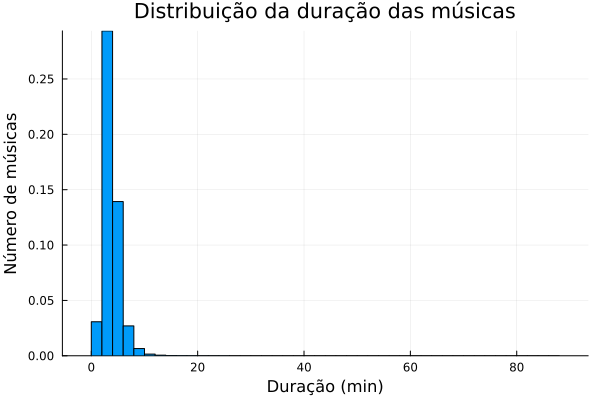

In [ ]:
df.duration_min = df.duration_ms ./ 60000

histogram(df[!, :duration_min],
    bins = 50,
    xlabel = "Duração (min)",
    ylabel = "Número de músicas",
    title = "Distribuição da duração das músicas",
    normalize = true,
    legend = false)

## Medidas de correlação
* A correlação é uma medida estatística que descreve a força e a direção do relacionamento linear entre duas variáveis quantitativas.
O coeficiente de correlação, r, varia entre -1 e 1:

  - indica correlação positiva perfeita,

  - -1 indica correlação negativa perfeita,

  - 0 indica ausência de correlação.

Uma correlação positiva significa que, à medida que uma variável aumenta, a outra também tende a aumentar.
Já uma correlação negativa significa que, à medida que uma variável aumenta, a outra tende a diminuir.

- **Exercício 6**
  - **6.1** Separe as colunas do dataframe em `var_numericas` e `var_categoricas`.
  - Exemplo:
    ``` julia
    var_numericas = [:popularity, :duration_ms]
    var_categoricas = [:track_genre, :track_id]
    ```

  - **6.2** Gere uma nova tabela, derivada da tabela original, com apenas as variáveis numéricas. Chame essa nova tabela de `numdf`.
  - **6.3** Usando `cor(Matrix())`, faça uma matriz de correlação com as variáveis de `numdf`.

  - **6.4** Plote-a usando a função `heatmap()`. Quais variáveis se relacionam mais e quais se relacionam menos?
> Dica: a função `heatmap()` recebe valores tridimensionais. Converta a variável `var_numericas` para `String` e relacione com a matriz de correlação.

  - **6.5** Gere também uma outra tabela `X`, que conterá apenas as colunas numéricas e categóricas que usaremos em nosso modelo, e separe nossa variável resposta numa variável `Y` isolada.

In [ ]:
# Escreva seu código aqui

In [ ]:
var_numericas = [:popularity, :duration_ms, :danceability,
             :loudness, :speechiness, :acousticness, :instrumentalness,
             :liveness, :valence, :tempo]
var_categoricas = [:track_genre, :explicit]

2-element Vector{Symbol}:
 :track_genre
 :explicit

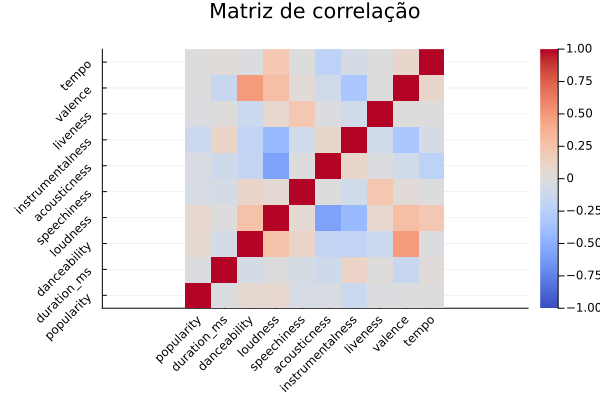

In [ ]:
# Selecionar e limpar
numdf = select(df, var_numericas)

# Matriz de correlação
corr_matrix = cor(Matrix(numdf))

# Heatmap
heatmap(String.(var_numericas), String.(var_numericas), corr_matrix;
    c = :coolwarm, clim = (-1, 1), aspect_ratio = 1,
    xlabel = "", ylabel = "", title = "Matriz de correlação",
    xrotation = 45,
    yrotation = 45)

In [ ]:
X = select(df, union(var_numericas, var_categoricas))
y = df.energy

X

Row,popularity,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,explicit
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String31,Bool
1,73,230666,0.676,-6.746,0.143,0.0322,1.01e-6,0.358,0.715,87.917,acoustic,false
2,55,149610,0.42,-17.235,0.0763,0.924,5.56e-6,0.101,0.267,77.489,acoustic,false
3,57,210826,0.438,-9.734,0.0557,0.21,0.0,0.117,0.12,76.332,acoustic,false
4,71,201933,0.266,-18.515,0.0363,0.905,7.07e-5,0.132,0.143,181.74,acoustic,false
5,82,198853,0.618,-9.681,0.0526,0.469,0.0,0.0829,0.167,119.949,acoustic,false
6,58,214240,0.688,-8.807,0.105,0.289,0.0,0.189,0.666,98.017,acoustic,false
7,74,229400,0.407,-8.822,0.0355,0.857,2.89e-6,0.0913,0.0765,141.284,acoustic,false
8,80,242946,0.703,-9.331,0.0417,0.559,0.0,0.0973,0.712,150.96,acoustic,false
9,74,189613,0.625,-8.7,0.0369,0.294,0.0,0.151,0.669,130.088,acoustic,false


## Pré-Processamento Pt. 1 - Divisão do dataset em dataset de Treino e dataset de Teste

In [ ]:
using MLJ
# Substitua o parâmetro ? pela porcentagem (em decimal) do dataset total que você deseja designar para
# treino. O Restante ficará para com dataset de teste.
# Divisão treino/teste (80% / 20%) ---
train_idx, test_idx = partition(collect(eachindex(y)), 0.8, shuffle=true, rng=42)

X_train = X[train_idx, :]
X_test  = X[test_idx, :]
y_train = y[train_idx]
y_test  = y[test_idx]

17948-element Vector{Float64}:
 0.876
 0.961
 0.863
 0.298
 0.472
 0.748
 0.627
 0.8
 0.217
 0.514
 0.852
 0.895
 0.395
 ⋮
 0.981
 0.557
 0.479
 0.702
 0.661
 0.601
 0.894
 0.957
 0.746
 0.714
 0.713
 0.707

## Pré-Processamento Pt. 2 - Normalização das variáveis numéricas

In [ ]:
describe(df[:, var_numericas], :min, :max)


Row,variable,min,max
,Symbol,Real,Real
1,popularity,0,100
2,duration_ms,0,5237295
3,danceability,0.0,0.985
4,loudness,-49.531,4.532
5,speechiness,0.0,0.965
6,acousticness,0.0,0.996
7,instrumentalness,0.0,1.0
8,liveness,0.0,1.0
9,valence,0.0,0.995


In [ ]:
# --- 3. Normalização das colunas contínuas ---
using MLJ
using StatsBase

X_train_scaled = deepcopy(X_train)
X_test_scaled  = deepcopy(X_test)

for col in var_numericas
    x_train = Float64.(X_train[!, col])
    scaler = fit(UnitRangeTransform, x_train)

    X_train_scaled[!, col] = StatsBase.transform(scaler, x_train)
    X_test_scaled[!, col]  = StatsBase.transform(scaler, Float64.(X_test[!, col]))
end

# colunas categóricas permanecem inalteradas

# Ver resumo estatístico das colunas numéricas
describe(X_train_scaled[:, var_numericas])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,popularity,0.33243,0.0,0.33,1.0,0,Float64
2,duration_ms,0.0437638,0.0,0.0407206,1.0,0,Float64
3,danceability,0.571105,0.0,0.584772,1.0,0,Float64
4,loudness,0.759138,0.0,0.783382,1.0,0,Float64
5,speechiness,0.0905379,0.0,0.0506736,1.0,0,Float64
6,acousticness,0.329776,0.0,0.188755,1.0,0,Float64
7,instrumentalness,0.172356,0.0,5.75e-5,1.0,0,Float64
8,liveness,0.21677,0.0,0.132,1.0,0,Float64
9,valence,0.472358,0.0,0.459296,1.0,0,Float64


In [ ]:
# Visualizar as primeiras 5 linhas do df original para comparar
first(X, 5)

Row,popularity,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,explicit
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String31,Bool
1,73,230666,0.676,-6.746,0.143,0.0322,1.01e-6,0.358,0.715,87.917,acoustic,false
2,55,149610,0.42,-17.235,0.0763,0.924,5.56e-6,0.101,0.267,77.489,acoustic,false
3,57,210826,0.438,-9.734,0.0557,0.21,0.0,0.117,0.12,76.332,acoustic,false
4,71,201933,0.266,-18.515,0.0363,0.905,7.07e-5,0.132,0.143,181.74,acoustic,false
5,82,198853,0.618,-9.681,0.0526,0.469,0.0,0.0829,0.167,119.949,acoustic,false


In [ ]:
# Visualizar as primeiras 5 linhas do df normalizado para comparar
first(X_train_scaled, 5)

Row,popularity,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,explicit
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String31,Bool
1,0.02,0.0467425,0.474112,0.832843,0.0467358,0.000187751,0.000493,0.105,0.556784,0.534273,hard-rock,false
2,0.17,0.0318867,0.832487,0.684627,0.127461,0.156627,0.282,0.384,0.358794,0.472836,malay,false
3,0.32,0.041426,0.759391,0.715221,0.288083,0.356426,0.000501,0.643,0.337688,0.513679,sad,false
4,0.0,0.0338167,0.450761,0.791743,0.129534,0.0671687,0.0,0.124,0.442211,0.753747,electro,false
5,0.61,0.0230999,0.77665,0.779757,0.205181,0.232932,0.0,0.233,0.570854,0.526071,anime,true


In [ ]:
# Ver resumo estatístico das colunas numéricas
describe(df[:, var_numericas])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,popularity,33.1984,0,33.0,100,0,Int64
2,duration_ms,2.29142e5,0,213293.0,5237295,0,Int64
3,danceability,0.562166,0.0,0.576,0.985,0,Float64
4,loudness,-8.499,-49.531,-7.185,4.532,0,Float64
5,speechiness,0.087442,0.0,0.0489,0.965,0,Float64
6,acousticness,0.328289,0.0,0.188,0.996,0,Float64
7,instrumentalness,0.173413,0.0,5.8e-5,1.0,0,Float64
8,liveness,0.21697,0.0,0.132,1.0,0,Float64
9,valence,0.469477,0.0,0.457,0.995,0,Float64


## Pré-Processamento Pt. 3 - Encoding das variáveis categóricas

  - Aplicar one hot encoding em variáveis categóricas é uma técnica comum para converter essas variáveis em um formato que pode ser usado por algoritmos de aprendizado de máquina.
  - Isso envolve criar colunas binárias para cada categoria, permitindo que o modelo aprenda a partir dessas variáveis categóricas de forma mais eficaz.
  - Essa técnica é essencial em modelos como regressão linear, árvores de decisão e redes neurais, onde as variáveis categóricas precisam ser representadas numericamente.

In [ ]:
using CategoricalArrays, MLJ

# --- converter colunas de string para categóricas (apenas nas features) ---
for col in names(X_train_scaled)
    if eltype(X_train_scaled[!, col]) <: AbstractString
        X_train_scaled[!, col] = categorical(X_train_scaled[!, col])
        X_test_scaled[!, col]  = categorical(X_test_scaled[!, col])
    end
end

# --- One-Hot Encoder (ajusta no treino, transforma treino e teste) ---
ohe = OneHotEncoder(drop_last=true)  # drop_last evita multicolinearidade para GLM

mach_ohe = MLJ.machine(ohe, X_train_scaled)
MLJ.fit!(mach_ohe)

X_train_cleaned = MLJ.transform(mach_ohe, X_train_scaled)
X_test_cleaned  = MLJ.transform(mach_ohe, X_test_scaled)


X_train_cleaned


[ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
[ Info: Spawning 112 sub-features to one-hot encode feature :track_genre.


Row,popularity,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre__acoustic,track_genre__afrobeat,track_genre__alt-rock,track_genre__alternative,track_genre__ambient,track_genre__anime,track_genre__black-metal,track_genre__bluegrass,track_genre__blues,track_genre__brazil,track_genre__breakbeat,track_genre__british,track_genre__cantopop,track_genre__chicago-house,track_genre__children,track_genre__chill,track_genre__classical,track_genre__club,track_genre__comedy,track_genre__country,track_genre__dance,track_genre__dancehall,track_genre__death-metal,track_genre__deep-house,track_genre__detroit-techno,track_genre__disco,track_genre__disney,track_genre__drum-and-bass,track_genre__dub,track_genre__dubstep,track_genre__edm,track_genre__electro,track_genre__electronic,track_genre__emo,track_genre__folk,track_genre__forro,track_genre__french,track_genre__funk,track_genre__garage,track_genre__german,track_genre__gospel,track_genre__goth,track_genre__grindcore,track_genre__groove,track_genre__grunge,track_genre__guitar,track_genre__happy,track_genre__hard-rock,track_genre__hardcore,track_genre__hardstyle,track_genre__heavy-metal,track_genre__hip-hop,track_genre__honky-tonk,track_genre__house,track_genre__idm,track_genre__indian,track_genre__indie,track_genre__indie-pop,track_genre__industrial,track_genre__iranian,track_genre__j-dance,track_genre__j-idol,track_genre__j-pop,track_genre__j-rock,track_genre__jazz,track_genre__k-pop,track_genre__kids,track_genre__latin,track_genre__latino,track_genre__malay,track_genre__mandopop,track_genre__metal,track_genre__metalcore,track_genre__minimal-techno,track_genre__mpb,track_genre__new-age,track_genre__opera,track_genre__pagode,track_genre__party,track_genre__piano,track_genre__pop,track_genre__pop-film,track_genre__power-pop,track_genre__progressive-house,track_genre__psych-rock,track_genre__punk,track_genre__punk-rock,track_genre__r-n-b,track_genre__reggae,track_genre__reggaeton,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.02,0.0467425,0.474112,0.832843,0.0467358,0.000187751,0.000493,0.105,0.556784,0.534273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
2,0.17,0.0318867,0.832487,0.684627,0.127461,0.156627,0.282,0.384,0.358794,0.472836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
3,0.32,0.041426,0.759391,0.715221,0.288083,0.356426,0.000501,0.643,0.337688,0.513679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
typeof(X_train_cleaned)

## Pré-Processamento Pt. 4 - Transformar o df em Matriz

  - Essa técnica é essencial para modelos de Regressão Linear Múltipla

  - `Float64.(Matrix(X_train_cleaned))` garante que todas as colunas sejam numéricas, requisito do `GLM.jl`, o pacote que usaremos para implementar nossa Reg. Lin. Múltipla.

  - Nesse pacote, quando temos múltiplas features, podemos usar a forma matricial `(X e y)` ou transformar `X_train_cleaned` em `DataFrame` com colunas nomeadas para usar fórmula.

  - Faremos uso da abordagem matricial, que funciona diretamente com `DataFrame` ou `Matrix`.

  - A função abaixo serve para retornar o tipo de dado de algum objeto. Em outras palavras:

  - - Ela não mostra o conteúdo da variável.

  - - Ela diz de que “classe” ou estrutura interna o objeto é, por exemplo: `DataFrame`, `Matrix{Float64}`, `CategoricalArray{String,1,UInt32}`, etc.

In [ ]:
X_train_mat = Matrix(X_train_cleaned)
display(typeof(X_train_mat))

X_test_mat = Matrix(X_test_cleaned)
display(typeof(X_test_mat))

X_train_mat


Matrix{Float64} (alias for Array{Float64, 2})

Matrix{Float64} (alias for Array{Float64, 2})

71793×123 Matrix{Float64}:
 0.02  0.0467425  0.474112  0.832843  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.17  0.0318867  0.832487  0.684627     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.32  0.041426   0.759391  0.715221     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0338167  0.450761  0.791743     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.61  0.0230999  0.77665   0.779757     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.17  0.0390257  0.764467  0.783419  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.35  0.0311688  0.582741  0.692803     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.68  0.0324133  0.561421  0.825925     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.1   0.0599411  0.782741  0.64497      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.46  0.0841347  0.616244  0.774319     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.62  0.0244023  0.798985  0.75412   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.29  0.0377496  0.647716  0.742874     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.65  0.0306467  0.77868   0.783419     0.0  0.0  0.0  0.0  0.0  0.0  1.

  - Vetorização da variável resposta (*target variable*), `energy`:

In [ ]:
y_train_vec = y_train
y_test_vec  = y_test

17948-element Vector{Float64}:
 0.876
 0.961
 0.863
 0.298
 0.472
 0.748
 0.627
 0.8
 0.217
 0.514
 0.852
 0.895
 0.395
 ⋮
 0.981
 0.557
 0.479
 0.702
 0.661
 0.601
 0.894
 0.957
 0.746
 0.714
 0.713
 0.707

# Modelagem

  - Durante a etapa de modelagem, segue-se o seguinte fluxo:

  - **1.** Escolha de um algoritmo ou técnica

  - - Ex.: regressão linear, árvores de decisão, redes neurais, SVM etc.
  - - Essa escolha depende do tipo de problema (classificação, regressão, clustering, etc.) e das características dos dados.

  - **2.** Treinamento do modelo

  - - Alimentamos o algoritmo com os dados de treino.

  - - O modelo ajusta seus parâmetros internos para minimizar um erro ou maximizar um desempenho (função de custo/objetivo).

  - **3.** Validação e ajuste

  - - Utilização dos dados de validação para verificar se o modelo está generalizando bem (tendo bom desempenho nos dados de teste).

  - - Ajuste dos hiperparâmetros (ex.: profundidade da árvore, taxa de aprendizado, número de neurônios).

  - **(Opcional) 4.** Comparação de modelos diferentes

  - - Treina-se vários algoritmos e compara métricas (ex.: acurácia, precisão, recall, RMSE).

  - - Escolhe-se aquele com melhor equilíbrio entre desempenho e simplicidade.

In [ ]:
using GLM, Statistics

"""
Treina um modelo de regressão linear múltipla e calcula métricas de avaliação.
Retorna um NamedTuple com o modelo e as métricas.
"""
function train_linear_regression(X_train, y_train, X_test, y_test)
    # Ajustar modelo
    model = lm(X_train_mat, y_train_vec)

    # Predições
    y_pred_train = GLM.predict(model, X_train_mat)
    y_pred_test  = GLM.predict(model, X_test_mat)

    # Métricas
    r2_train = 1 - sum((y_train_vec - y_pred_train).^2) / sum((y_train_vec .- mean(y_train_vec)).^2)
    r2_test  = 1 - sum((y_test_vec - y_pred_test).^2) / sum((y_test_vec .- mean(y_test_vec)).^2)

    rmse_train = sqrt(mean((y_train_vec - y_pred_train).^2))
    rmse_test  = sqrt(mean((y_test_vec - y_pred_test).^2))

    return (
        model       = model,
        r2_train    = r2_train,
        r2_test     = r2_test,
        rmse_train  = rmse_train,
        rmse_test   = rmse_test
    )
end

train_linear_regression

In [ ]:
result = train_linear_regression(X_train_cleaned, y_train, X_test_cleaned, y_test)

println("R² treino: ", result.r2_train, " | R² teste: ", result.r2_test)
println("RMSE treino: ", result.rmse_train, " | RMSE teste: ", result.rmse_test)


R² treino: 0.7893210362720906 | R² teste: 0.78438344036197
RMSE treino: 0.11756631313772113 | RMSE teste: 0.12001530902381861
